In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
df=pd.read_csv(r"C:\Users\MuntasirulHoque\OneDrive - ADA Global\Desktop\ML CODE\Diabetics\Diabetes-prediction-dataset\diabetes_prediction_dataset\diabetes_prediction_dataset.csv")

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [8]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [10]:
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [11]:
df["smoking_history"].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

<Axes: title={'center': 'Count for Diabetics'}, xlabel='diabetes', ylabel='count'>

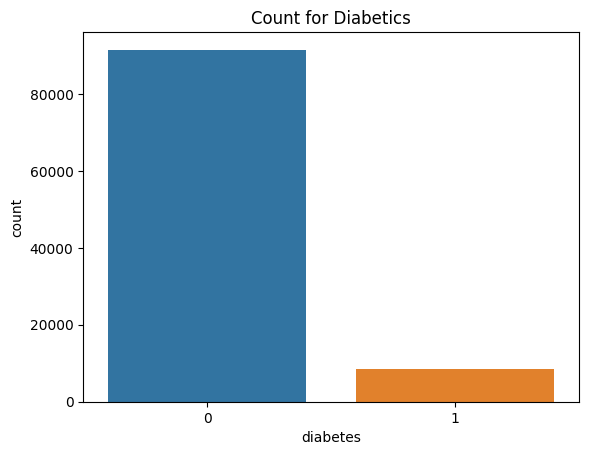

In [13]:
plt.title("Count for Diabetics")
sns.countplot(data=df,x='diabetes')

<Axes: title={'center': 'Count for gender'}, xlabel='gender', ylabel='count'>

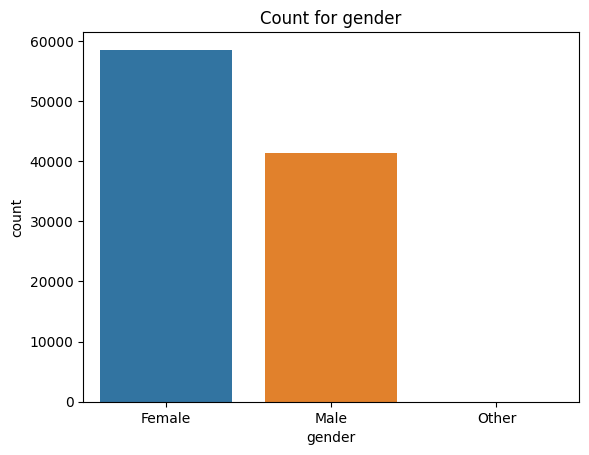

In [14]:
plt.title("Count for gender")
sns.countplot(data=df,x='gender')

<Axes: >

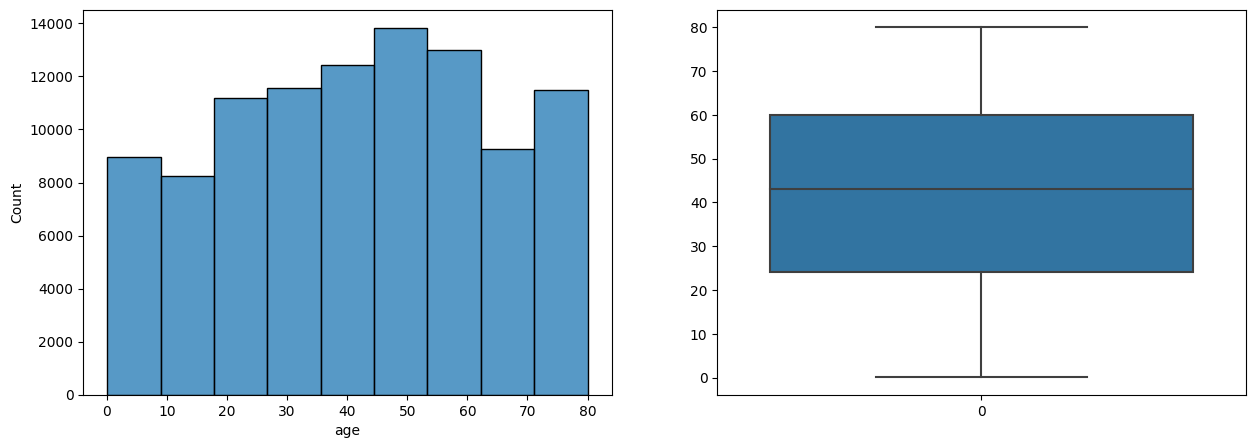

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['age'], bins=9, ax=axes[0, 0])
sns.boxplot(df['age'], ax=axes[0, 1])

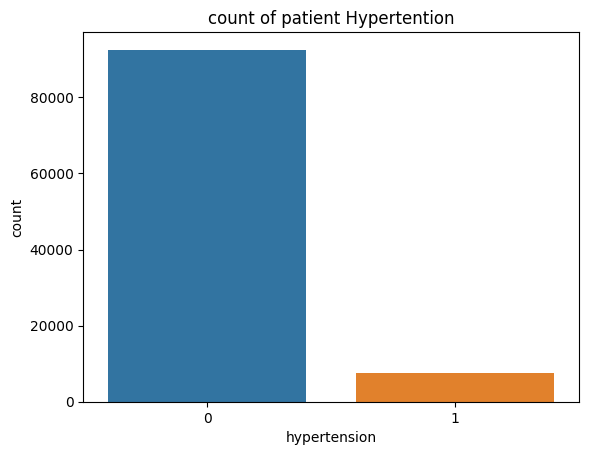

In [17]:
plt.title('count of patient Hypertention')
sns.countplot(data=df, x='hypertension');

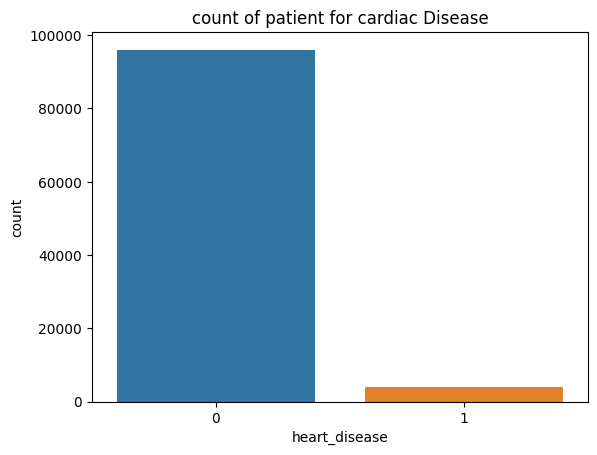

In [18]:
plt.title('count of patient for cardiac Disease')
sns.countplot(data=df, x='heart_disease');

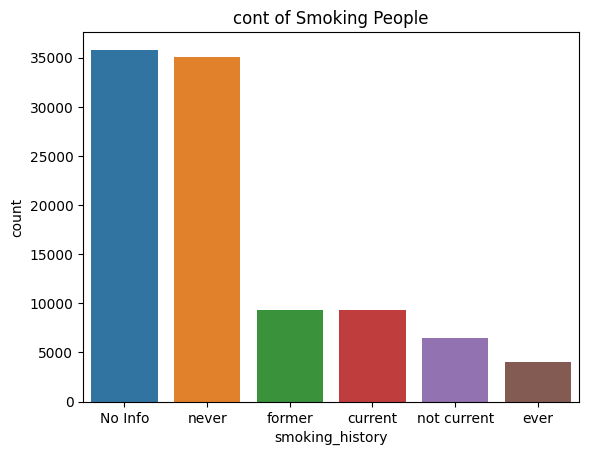

In [20]:
plt.title('cont of Smoking People')
sns.countplot(data=df, x='smoking_history', order=df['smoking_history'].value_counts().index);

<Axes: >

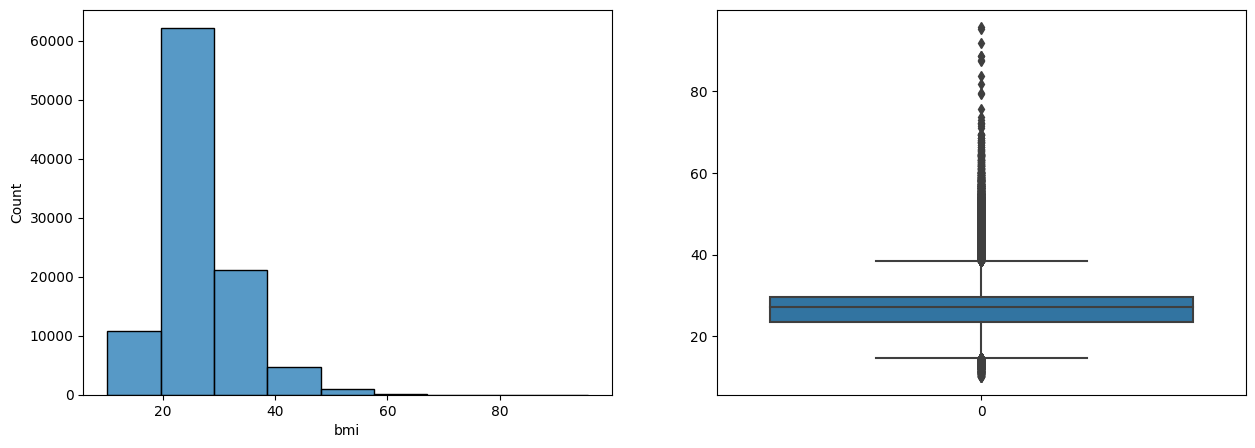

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['bmi'], bins=9, ax=axes[0, 0])
sns.boxplot(df['bmi'], ax=axes[0, 1])

<Axes: >

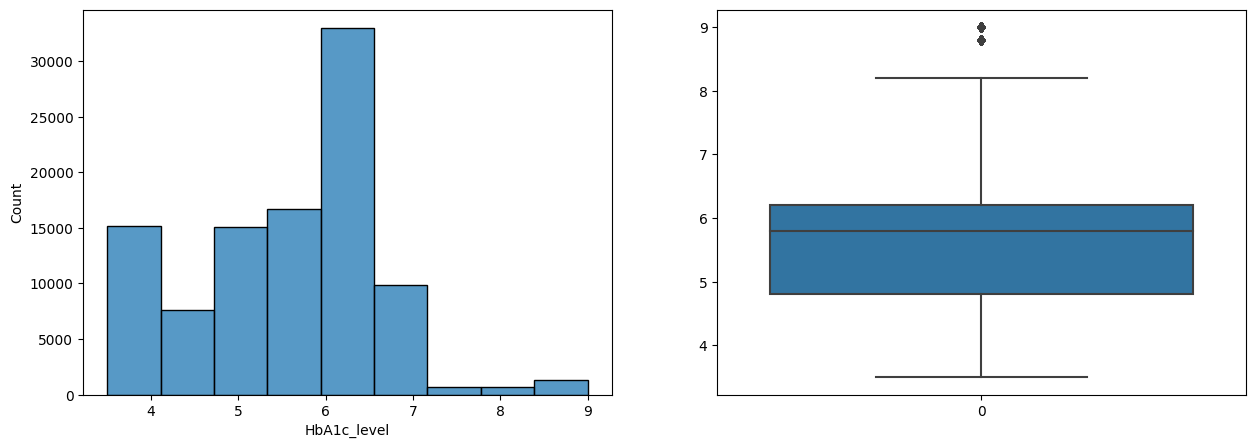

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15,5), squeeze=False)

sns.histplot(df['HbA1c_level'], bins=9, ax=axes[0, 0])
sns.boxplot(df['HbA1c_level'], ax=axes[0, 1])

C:\Users\MuntasirulHoque\AppData\Local\Temp\ipykernel_12868\3729537242.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


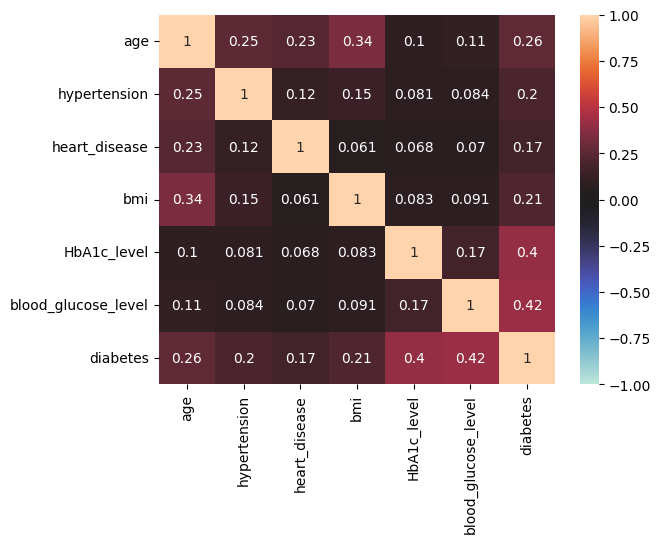

In [26]:
corr = df.corr()
sns.heatmap(corr, vmin=-1, center=0, vmax=1, annot=True);

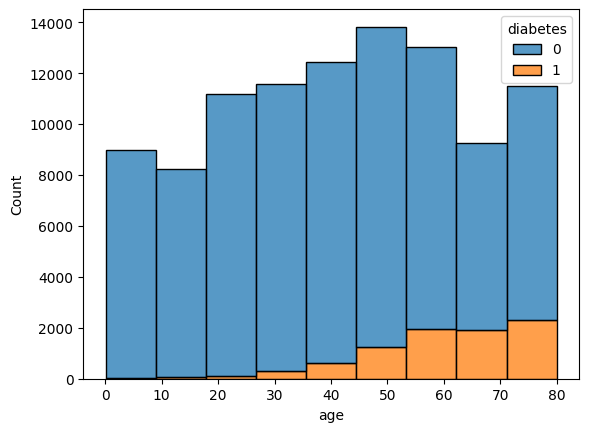

In [27]:
sns.histplot(data=df, x='age', bins=9, hue='diabetes', multiple="stack");

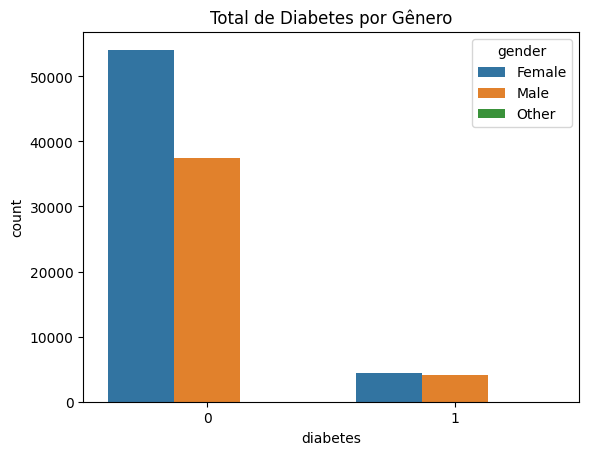

In [28]:
plt.title('Total de Diabetes por Gênero')
sns.countplot(data=df, x='diabetes', hue='gender');

In [29]:
def removeoutlier(dataframe, column):
    """
    Remove outliers de uma coluna em um DataFrame.

    Args:
        dataframe (pd.DataFrame): DataFrame contendo os dados.
        column (str): Nome da coluna contendo os valores.

    Returns:
        pd.DataFrame: DataFrame sem outliers.
    """

    # Fator de multiplicação para determinar o intervalo considerado normal
    fator = 1.5

    # Obtém os valores da coluna do DataFrame
    values = dataframe[column].values

    # Cálculo dos percentis 75 (q3) e 25 (q1) dos valores
    q3, q1 = np.percentile(values, [75, 25])

    # Cálculo do intervalo interquartil (IQR)
    iqr = q3 - q1

    # Cálculo dos limites inferior e superior do intervalo considerado normal
    lowpass = q1 - (iqr * fator)
    highpass = q3 + (iqr * fator)

    # Filtra os valores dentro do intervalo considerado normal
    filtered_dataframe = dataframe[(dataframe[column] > lowpass) & (dataframe[column] < highpass)]

    return filtered_dataframe

In [30]:
# Bibliotecas de pré processamento
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split

# Bibliotecas de modelos preditivos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC

# Bibliotecas de métricas
from sklearn import metrics

In [31]:
diabetes2 = df.copy()

In [32]:
# Removendo outliers
diabetes2 = removeoutlier(diabetes2, 'bmi')
# diabetes2 = removeoutlier(diabetes2, 'HbA1c_level')
# diabetes2 = removeoutlier(diabetes2, 'blood_glucose_level')
diabetes2.shape

(92914, 9)

In [33]:
diabetes2.diabetes.value_counts()

0    85892
1     7022
Name: diabetes, dtype: int64

In [34]:
# Realizando o one-hot-encoding
diabetes2 = pd.get_dummies(diabetes2).reset_index()

In [35]:
# Separando a variável preditora
X = np.array(diabetes2.drop(['diabetes'], axis=1))
y = diabetes2['diabetes']

In [36]:
# Realizando a padronização dos dados
scaler = StandardScaler()
# scaler = Normalizer()

scaler.fit(X)

X = scaler.transform(X)

In [37]:
from sklearn.model_selection import StratifiedKFold

# Aplicando a validação cruzada estratificada
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

In [38]:
# Instanciando o modelo
model = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)

Acc: 95.4902593908083
F1: 71.04353835521769
Recall: 73.21937321937322
Precision: 68.99328859060402
R2 Score: 35.435057562196924


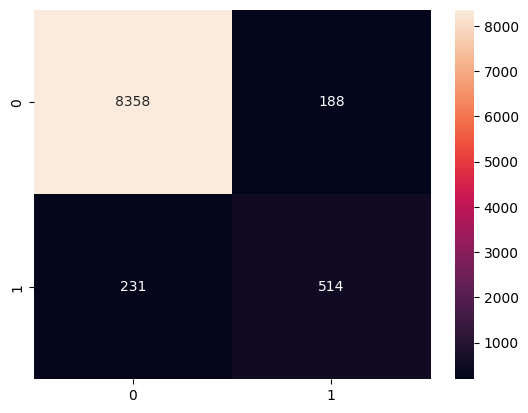

In [40]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');


In [41]:
# Instanciando o modelo
model = LogisticRegression(random_state=42)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)

Acc: 96.45893875793779
F1: 72.69709543568464
Recall: 62.39316239316239
Precision: 87.07753479125249
R2 Score: 49.303422286307374


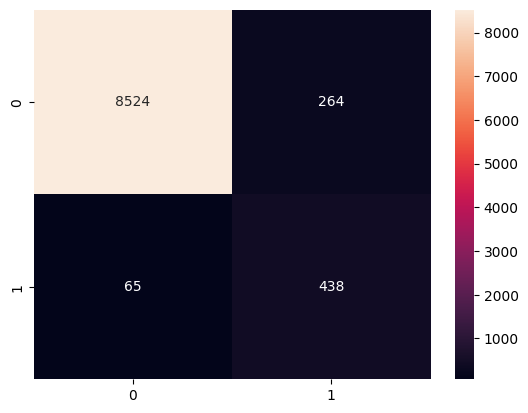

In [42]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

In [43]:
# Instanciando o modelo
model = KNeighborsClassifier(n_neighbors=8)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)

Acc: 96.44817565385857
F1: 70.16274864376129
Recall: 55.27065527065527
Precision: 96.03960396039604
R2 Score: 49.149329344928375


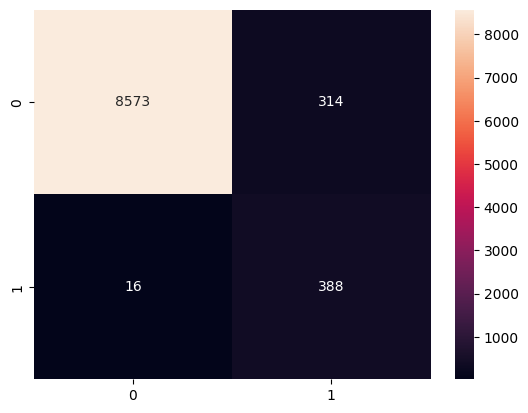

In [44]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

In [45]:
# Instanciando o modelo
model = RandomForestClassifier(random_state=2, max_depth=5, criterion='entropy')

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)


Acc: 97.51372295770099
F1: 80.30690537084399
Recall: 67.09401709401709
Precision: 100.0
R2 Score: 64.40453054144986


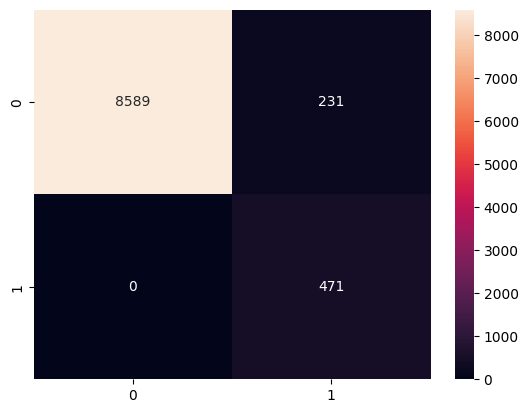

In [46]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

In [47]:
# Instanciando o modelo
model = SVC(random_state=2, kernel='linear' ) 

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)

In [ ]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

In [48]:
# Instanciando o modelo
model = AdaBoostClassifier(random_state=2)

# Treinando o modelo
model.fit(X_train, y_train)

# Realizando predição
y_pred = model.predict(X_test)

Acc: 97.49219674954257
F1: 80.50209205020921
Recall: 68.51851851851852
Precision: 97.56592292089249
R2 Score: 64.09634465869185


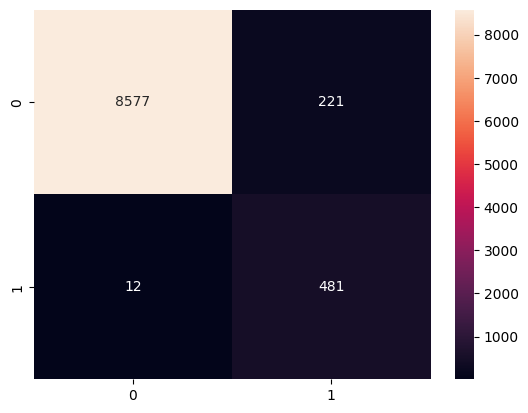

In [49]:
print('Acc:', metrics.accuracy_score(y_test, y_pred) * 100)
print('F1:', metrics.f1_score(y_test, y_pred) * 100)
print('Recall:', metrics.recall_score(y_test, y_pred) * 100)
print('Precision:', metrics.precision_score(y_test, y_pred) * 100)
print('R2 Score:', metrics.r2_score(y_test, y_pred) * 100)
sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');